In [37]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [18]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()



In [19]:
#  3. Convert the June temperatures to a list.
june_temps = list(june_temps)

In [20]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temps)
june_df

,date,tobs
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [22]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df = june_df.rename(columns={'tobs':'June Temps'})
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [23]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [24]:
# 7. Convert the December temperatures to a list.
dec_temps = list(dec_temps)

In [25]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps = pd.DataFrame(dec_temps)
dec_temps

,date,tobs
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [27]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps = dec_temps.rename(columns={'tobs':'December Temps'})
dec_temps.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 [Text(-250.0, 0, '2014-06-22'),
  Text(0.0, 0, '2010-06-01'),
  Text(250.0, 0, '2010-06-15'),
  Text(500.0, 0, '2010-06-30'),
  Text(750.0, 0, '2014-06-20'),
  Text(1000.0, 0, '2015-06-12'),
  Text(1250.0, 0, '2015-06-29'),
  Text(1500.0, 0, '2011-06-02'),
  Text(1750.0, 0, ''),
  Text(2000.0, 0, '')])

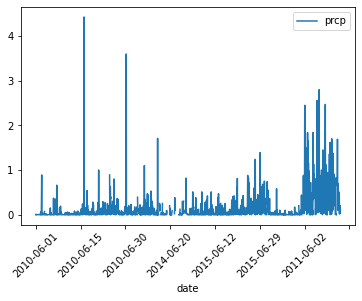